# 方法1

In [1]:
import os
import pandas as pd
import glob

df=pd.read_csv("poi_total.csv",header=0)
df.head()

,lat,lng,type,region,ntype
0,31.057080,121.711432,休闲娱乐;旅游景点,150,12
1,31.275961,121.452373,购物;超市,125,1
2,31.022801,121.658286,休闲娱乐;户外活动,149,12
3,31.262445,121.436216,交通运输;港口码头,125,-1
4,31.302132,121.513386,购物;其它购物,142,1


In [2]:
df = df.loc[df["region"] > 1 ]
df.head()

,lat,lng,type,region,ntype
0,31.057080,121.711432,休闲娱乐;旅游景点,150,12
1,31.275961,121.452373,购物;超市,125,1
2,31.022801,121.658286,休闲娱乐;户外活动,149,12
3,31.262445,121.436216,交通运输;港口码头,125,-1
4,31.302132,121.513386,购物;其它购物,142,1


In [3]:
data = df.loc[:, ['lat', 'lng','ntype']]
data.head()

,lat,lng,ntype
0,31.057080,121.711432,12
1,31.275961,121.452373,1
2,31.022801,121.658286,12
3,31.262445,121.436216,-1
4,31.302132,121.513386,1


In [4]:

from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry2 = [Point(xy) for xy in zip(data.lng,data.lat)]
data = data.drop(['lat', 'lng'], axis=1)
crs2 = {'init': 'epsg:4326'}
gdf2 = GeoDataFrame(data, crs=crs2, geometry=geometry2)
gdf2.head()
gdf2.plot()

In [5]:
gdf2.head()


,ntype,geometry
0,12,POINT (121.71143 31.05708)
1,1,POINT (121.45237 31.27596)
2,12,POINT (121.65829 31.02280)
3,-1,POINT (121.43622 31.26244)
4,1,POINT (121.51339 31.30213)


In [9]:
gg = gdf2.groupby('ntype')

In [6]:
import osmnx as ox

G = ox.graph_from_place('上海市,China',which_result=2,simplify=False,
                        custom_filter=('["area"!~"yes"]["highway"~"ringway|primary"]'
                                      '["service"!~"parking|parking_aisle|driveway|private|emergency_access"]'
                                      '["motor_vehicle"!~"no"]["motorcar"!~"no"]'
                                      )
                        )
nodes, edges = ox.graph_to_gdfs(G)


In [7]:
edges.head()

,access,bridge,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,tunnel,u,v,width
0,NaN,NaN,"LINESTRING (121.46283 31.23117, 121.46279 31.2...",primary,NaN,0,NaN,56.665,NaN,NaN,True,521708587,NaN,NaN,5082972161,5082972162,NaN
1,NaN,NaN,"LINESTRING (121.33471 31.15177, 121.33393 31.1...",primary,NaN,0,NaN,90.618,NaN,沪松公路,True,347341470,S124,NaN,1971847170,1971847193,NaN
2,NaN,NaN,"LINESTRING (121.46279 31.23168, 121.46269 31.2...",primary,NaN,0,NaN,120.280,NaN,NaN,True,521708587,NaN,NaN,5082972162,5083013939,NaN
3,NaN,NaN,"LINESTRING (121.46288 31.23064, 121.46283 31.2...",primary,NaN,0,NaN,59.088,NaN,NaN,True,521708587,NaN,NaN,5082972164,5082972161,NaN
4,NaN,NaN,"LINESTRING (121.46253 31.22916, 121.46257 31.2...",primary,NaN,0,2,28.882,NaN,NaN,True,511404880,NaN,NaN,5082972165,5082945221,NaN


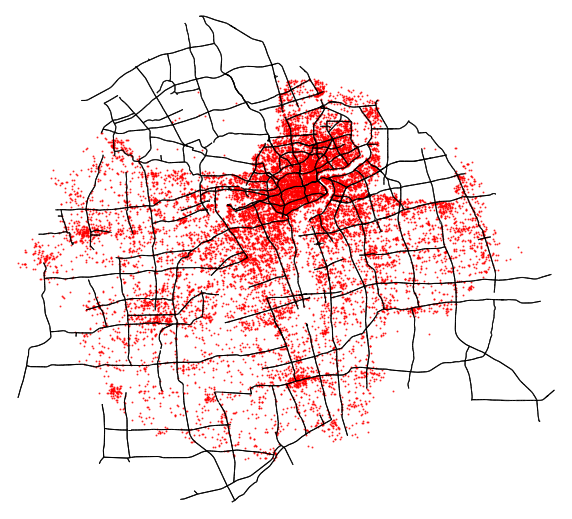

In [15]:
import matplotlib.pyplot as plt
fig, ax = ox.plot_graph(G, fig_height=10, fig_width=10, 
                        show=False, close=False, 
                        edge_color='black',node_size=0)
#ax.scatter(,c='red', s=10)
for key, values in gg:
    values.plot(ax=ax, color='red', alpha=0.7, markersize=1)
    break
plt.savefig("1.png")

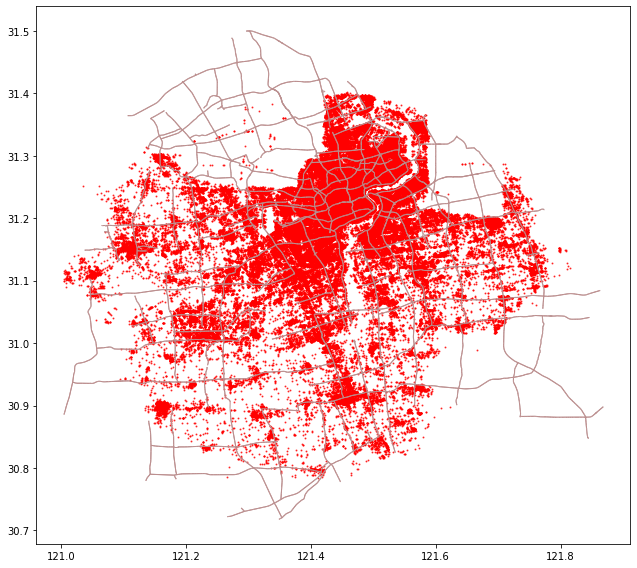

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
#area.plot(ax=ax, facecolor='black')
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')
gdf2.plot(ax=ax, color='red', alpha=0.7, markersize=1)
plt.tight_layout()

# 方法2

In [ ]:
import geopandas
import pandas
from shapely.geometry import Polygon,Point,LineString



In [ ]:
geofence=[]
for i in range(data.shape[0]): #设置文件对象并读取每一行文件
    x=data.iloc[i].latitude
    y=data.iloc[i].longitude
    z={'id':i,'geometry_type':'POINT','geometry':{'x':x,'y':y}}
    geofence.append(z)
    print(z)

In [ ]:
#转换为dataframe
geofenceDf=pandas.DataFrame(geofence)
type(geofenceDf)

In [ ]:
#构造geometry列
geometryList=[]
for i in range(0, len(geofenceDf)):
    geofencePoint = Point(geofenceDf.iloc[i]['geometry']['x'],geofenceDf.iloc[i]['geometry']['y']).buffer(1)
    geometryList.append(geofencePoint)


In [ ]:
#构建geodataframe
crs = {'init': 'epsg:32651'}
gdf = geopandas.GeoDataFrame(geofenceDf,crs=crs, geometry=geometryList)

In [ ]:
import geopandas as gpd
fp='E:/Program Files/jupyter_code/second/L2_data/Senaatintori.shp'
data = gpd.read_file(fp)

from pyproj import CRS
data.crs = CRS.from_epsg(3857).to_wkt()
data = data.to_crs(epsg="4326")

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
#area.plot(ax=ax, facecolor='black')
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')
data.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

In [ ]:
plt.savefig('导出的图片.png')